# Week 1 Day 1
# Tue 9/28

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/defreez/cs356-notebooks/blob/main/notebooks/week1-tue.ipynb)

## nd-array programming

- N-dimensional array is a fundamental data structure
- Multiple dimensons

In [10]:
import numpy as np

![struct](images/numpy-structure.png)

![indexing](images/numpy-indexing.png)

### Vectorization

![vectorization](images/numpy-vectorization.png)

In [12]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [13]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

### Fun with views and dimensions

In [15]:
v = np.arange(12)
v.reshape((4,3))
a = np.arange(10)
b = np.arange(20)
c = b[10:]
np.stack([a,c]).reshape(20,)
np.concatenate([a,b])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

## PyTorch tensors

- Similar to numpy arrays
- Can run on a CPU

In [16]:
import torch

In [18]:
torch.cuda.is_available()

True

In [20]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
a + b

tensor([5, 7, 9])

In [23]:
c = torch.stack([a,b])
c

tensor([[1, 2, 3],
        [4, 5, 6]])

In [24]:
c.shape

torch.Size([2, 3])

# FastAI

- FastAI is a wrapper written by the textbook authors around PyTorch
- Most of the time you can look at the source and understand what they are doing in PyTorch.
- Lots of functions defined for common operations

In [57]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

# The Six Lines

In [26]:
from fastbook import *

In [27]:
path = untar_data(URLs.PETS)/'images'

In [28]:
def is_cat(x): return x[0].isupper()

In [29]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, 
    label_func=is_cat, item_tfms=Resize(224)
)

In [30]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [31]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.170615,0.038698,0.008119,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.072438,0.043627,0.009472,00:17


In [60]:
# For Colab
uploader = widgets.FileUpload()

# For files stored locally (Jupyter)
#uploader = SimpleNamespace(data = ['data/images/pan.jpg'])

uploader

namespace(data=['data/images/pan.jpg'])

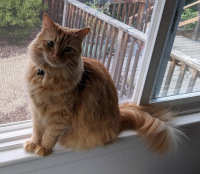

In [61]:
img = PILImage.create(uploader.data[0])
img

In [40]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000070


## What this does

1. Imports the code from fastbook module. This is the code associated with our textbook. Using FastAI is very similar to fastbook. Jumping to native PyTorch is a little work (next three classes).
1. Downloads a dataset.
1. Defines a function that tells us if a particular image in the dataset is a cat or not. This is a convention followed in the data set. It will vary from dataset to dataset!
1. Imports a pretrained generic model (resnet34). The 34 stands for the depth of the neural network.
1. "Fine tunes" the network. This rips off the last layer of the pre-trained model and retrains with our dataset.

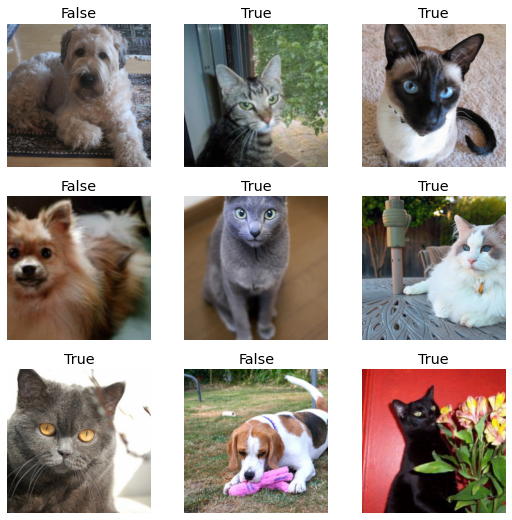

In [32]:
bdls.show_batch()

### Training

- Given a set of labeled data
- In this case images that are cat vs. not cat
- Assign weights to the neural network to minimize loss
- Done in a series of epochs
    - Train on a batch of data
    - Check how we are doing
    - Update the weights.
    - Repeat until .... ?

### Validation Data

- A portion of the training data is held out of the of data set
- Used 

### Test Data

- Another portion of data help out of the data set.
- NOT used to improve model
- Used to assess data at the end
- Ideally you never look at this until you are done. As soon as you use it to improve the model it's not really test data anymore.

In [43]:
![training](images/training.svg)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


## Convergence

- Normally we run until loss / error_rate stabilizes
- Loss is what the machine cares about (more about this next week)
- Error rate (1 - accuracy) is what we care about.
    - Calculated over validation set

epoch,train_loss,valid_loss,error_rate,time
0,0.154044,0.022042,0.006766,00:16


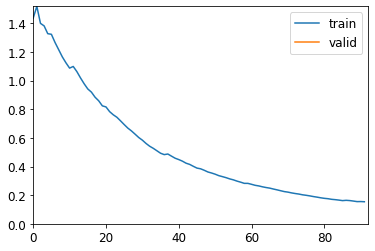

epoch,train_loss,valid_loss,error_rate,time
0,0.039612,0.015176,0.006089,00:17
1,0.022059,0.018128,0.008119,00:17
2,0.014226,0.013764,0.004736,00:17
3,0.023794,0.023759,0.006089,00:17
4,0.023141,0.028561,0.007442,00:17
5,0.025134,0.016468,0.005413,00:17
6,0.019937,0.012988,0.004736,00:17
7,0.014108,0.016896,0.005413,00:18
8,0.020876,0.019462,0.007442,00:17
9,0.019117,0.019799,0.005413,00:17


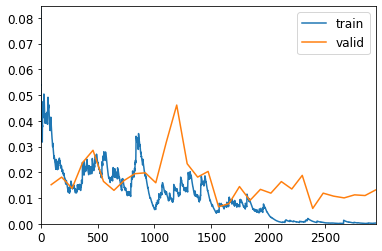

In [42]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, cbs=[ShowGraphCallback()])
learn.fine_tune(32)

### Saving your work

- It can take a lot of time to train a model
- Save it when you are done!

In [46]:
learn.save(gdrive/'myprecious')
learn = learn.load(gdrive/'myprecious')

# Use with_opt = False to deploy for inference.
# Makes model smaller but will prevent you from starting training again.

## Pre-trained Models

- We aren't starting from scratch here
- Start with a professionally trained model
- Often trained on ImageNet, other data sources
- Usually the model works OK without training, but not great
- fine tune this model to our purpose and it works great

![transfer learning](images/transfer.png)

###  Legality

- shrug? I am not a lawyer.
- Lots of people use Imagenet trained models for commercial purposes
  - Quite possibly illegal, depends on jurisdiction. 
  - Ask your lawyer before doing this.

# Multiple Classes

- Let's look at another classic dataset, MNIST
- 

In [47]:
path = untar_data(URLs.MNIST)/'training'
(path/'7').ls()

(#6265) [Path('/root/.fastai/data/mnist_png/training/7/47544.png'),Path('/root/.fastai/data/mnist_png/training/7/59083.png'),Path('/root/.fastai/data/mnist_png/training/7/18736.png'),Path('/root/.fastai/data/mnist_png/training/7/59724.png'),Path('/root/.fastai/data/mnist_png/training/7/3579.png'),Path('/root/.fastai/data/mnist_png/training/7/16004.png'),Path('/root/.fastai/data/mnist_png/training/7/47682.png'),Path('/root/.fastai/data/mnist_png/training/7/46765.png'),Path('/root/.fastai/data/mnist_png/training/7/22539.png'),Path('/root/.fastai/data/mnist_png/training/7/15570.png')...]

In [48]:
pat = r'^.*/mnist_png/training/(\d)/.*.png$'

In [49]:
re.findall(pat, '/root/.fastai/data/mnist_png/training/7/34609.png')

['7']

In [50]:
dls = ImageDataLoaders.from_path_re(path, get_image_files(path), pat)

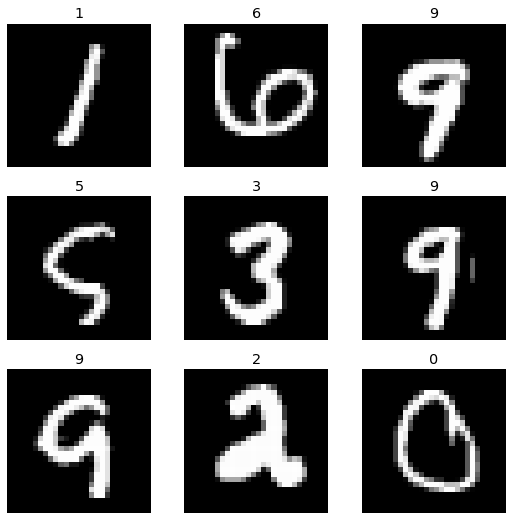

In [51]:
dls.show_batch()

In [52]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,error_rate,time
0,0.702638,0.483071,0.153000,00:55


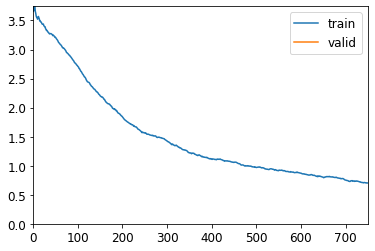

epoch,train_loss,valid_loss,error_rate,time
0,0.122957,0.083806,0.025833,01:02
1,0.059045,0.049348,0.013667,01:02
2,0.034185,0.036197,0.010583,01:02
3,0.015546,0.035184,0.010250,01:02


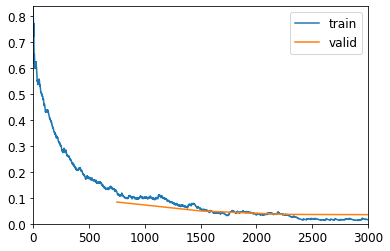

In [53]:
learn.fine_tune(4)

In [54]:
uploader = SimpleNamespace(data = ['data/images/8.png'])

In [55]:
img = PILImage.create(uploader.data[0])
learn.predict(img)

('8',
 tensor(8),
 tensor([0.1403, 0.0043, 0.0037, 0.0305, 0.0033, 0.0068, 0.0070, 0.0032, 0.7868, 0.0142]))

## Using Colab

- Website for book has good guide [https://course.fast.ai/start_colab](https://course.fast.ai/start_colab)

## Exercise

1. Try cat / notcat on another of a few other images. Does it work?
1. Use the regex namer and the PETS dataset to fine tune a model for pet breeds, not binary classification.
    - Use the same PETS dataset as cat / nocat
    - Hardest part of this exercise
    - Look at the naming pattern of the pets dataset
    - Use from_name_re (just the filename) or from_path_re (just the filepath)
    - Fine-tune resnet34 for 1 epoch    
1. Try getting the pet breed of a few other images.

We'll come back as a group. Share anything fun you found.